The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
(1784, 2017)
here


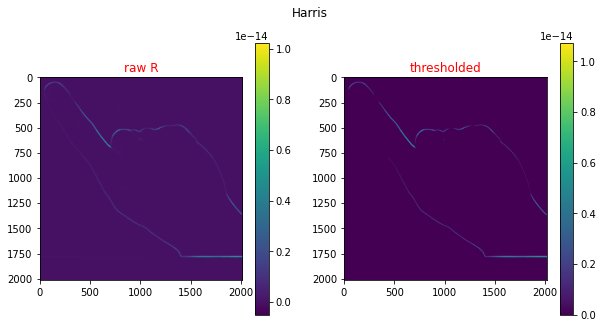

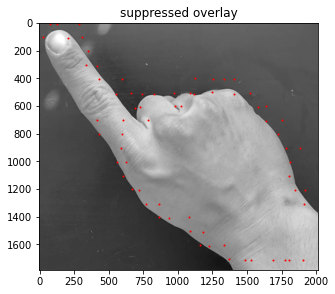

In [7]:
from harris import Harris
from operator import matmul
import skvideo.io  
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter, laplace
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import ceil, floor,  pi, sqrt
import imageio as iio
from PIL import Image
from skimage import color
from skimage import io

%load_ext autoreload
%autoreload 2
imgGray = color.rgb2gray(cv2.imread('C:\\Users\\Jaiydev Gupta\\Documents\\5524 project\\cse5524-project\\data\\angle_left.png'))
#imgGray = color.rgb2gray(img)
print(imgGray.shape)
interestpoints = Harris(imgGray)

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(interestpoints.R)
plt.colorbar()
plt.gca().set_title('raw R', c='r')

plt.subplot(1, 2, 2)
thresh = interestpoints.thresh
plt.imshow(thresh)
plt.colorbar()

plt.gca().set_title('thresholded', c='r')

plt.suptitle('Harris')
plt.show()

plt.figure(figsize=(5, 5))
plt.gca().imshow(imgGray, cmap='gray')
plt.gca().scatter(*zip(*interestpoints.suppressed), s=1, c='r')
plt.title('suppressed overlay')
plt.show()


4.5168043e-05
-1.920569e-06
4.708861e-05
0.0
R(16:22, 16:22)
[[1.9205679e-06 1.9205672e-06 1.9205677e-06 1.9205681e-06 1.9205675e-06
  1.9205688e-06]
 [1.9205684e-06 1.9205684e-06 1.9205686e-06 1.9205686e-06 1.9205679e-06
  1.9205686e-06]
 [1.9205684e-06 1.9205695e-06 1.9205700e-06 1.9205697e-06 1.9205693e-06
  1.9205697e-06]
 [1.9205681e-06 1.9205697e-06 1.9205709e-06 1.9205704e-06 1.9205702e-06
  1.9205706e-06]
 [1.9205684e-06 1.9205697e-06 1.9205715e-06 1.9205709e-06 1.9205706e-06
  1.9205706e-06]
 [1.9205686e-06 1.9205697e-06 1.9205720e-06 1.9205711e-06 1.9205704e-06
  1.9205702e-06]]


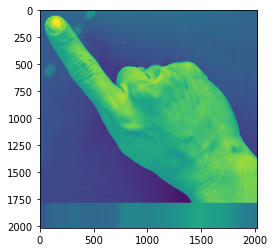

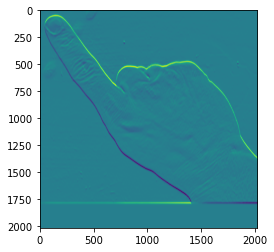

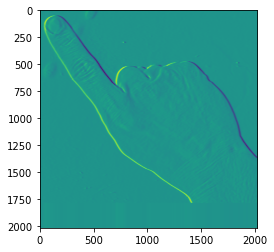

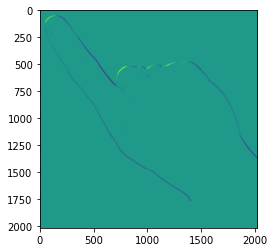

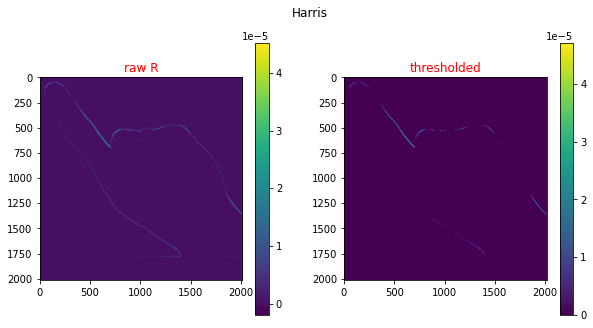

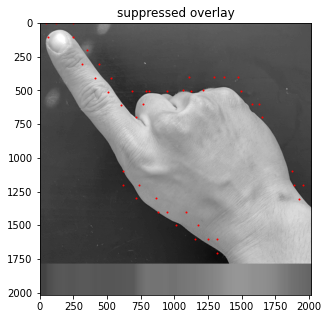

In [8]:

from operator import matmul
import skvideo.io  
import numpy as np
import cv2
from scipy.ndimage import gaussian_filter, laplace
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from math import ceil, floor,  pi, sqrt
import imageio as iio
from PIL import Image
from skimage import color
from skimage import io
from scipy import ndimage, misc
from log import Log

def gaussDeriv2D(sigma):
    x = np.array(range(0, 6*ceil(sigma)))
    y = np.transpose(x)
    Gx = ((x-3*ceil(sigma))/(2*pi*sigma**4)) * \
        (np.exp(-(((x-3*ceil(sigma))**2+(y-3*ceil(sigma))**2)/(2*sigma**2))))
    Gy = ((y-3*ceil(sigma))/(2*pi*sigma**4)) * \
        (np.exp(-(((x-3*ceil(sigma))**2+(y-3*ceil(sigma))**2)/(2*sigma**2))))
    return [Gx, Gy[np.newaxis]]

from skimage.color import rgb2gray
checker = rgb2gray(plt.imread('C:\\Users\\Jaiydev Gupta\\Documents\\5524 project\\cse5524-project\\data\\angle_left.png')[:,:,:3]*255)
checker = np.pad(checker, ((0, np.max(checker.shape) - np.min(checker.shape)), (0, 0)), 'mean')
checker = cv2.GaussianBlur(checker, (3,3), 10)
plt.imshow(checker)
alpha = 0.05
dx, dy = gaussDeriv2D(10)

ix = cv2.filter2D(checker, -1, dx)
iy = cv2.filter2D(checker, -1, dy)
plt.figure()
plt.imshow(ix)
plt.figure()
plt.imshow(iy)

ix2 = np.square(ix)
iy2 = np.square(iy)
ixiy = ix *iy
plt.figure()
plt.imshow(ixiy)

gx = cv2.GaussianBlur(ix2, (3, 3), 1)
gy = cv2.GaussianBlur(iy2, (3, 3), 1)
gxgy = cv2.GaussianBlur(ixiy, (3, 3), 1)

R = gx*gy - np.square(gxgy) - alpha*np.square(gx+gy)
# for some reason I get negative significant values instead of positive?
R = -R
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(R)
plt.colorbar()
plt.gca().set_title('raw R', c='r')
# remove vals less than 1e6
print(np.max(R))
print(np.min(R))
R = R + np.abs(np.min(R))
threshold = np.where(R <1e-5, 0, R)
plt.subplot(1, 2, 2)
plt.imshow(threshold)
plt.colorbar()
print(np.max(threshold))
print(np.min(threshold))
plt.gca().set_title('thresholded', c='r')
print('R(16:22, 16:22)')
print(R[16:22, 16:22])

w_size = 100
suppress = []
im_h, im_w = threshold.shape[:2]

for r in np.arange(im_h - w_size + 1, step=w_size):
    for c in np.arange(im_w - w_size + 1, step=w_size):
        region = threshold[r:r+w_size, c:c+w_size]
        if np.unique(region).size > 0:
            if np.max(np.unique(region)) > 0:
                max_r, max_c = np.unravel_index(np.argmax(np.unique(region)), region.shape)
                suppress.append((c+max_c, r+max_r))

plt.suptitle('Harris')
plt.show()

plt.figure(figsize=(5, 5))
plt.gca().imshow(checker, cmap='gray')
plt.gca().scatter(*zip(*suppress), s=1, c='r')
plt.title('suppressed overlay')
plt.show()

laplaOfGauss = Log(threshold)
store = laplaOfGauss.arr
# sigma = 10
# #  ndimage.gaussian_laplace(threshold, sigma=1)
# ## octave 1
# print(type(suppress))
# # level1 = cv2.GaussianBlur(threshold, (3,3), sigma)
# # level2 = cv2.GaussianBlur(level1, (3,3), sigma)
# # level3 = cv2.GaussianBlur(level2, (3,3), sigma)
# # level4 = cv2.GaussianBlur(level3, (3,3), sigma)
# log1 = ndimage.gaussian_laplace(threshold, sigma=10*1.2**0)
# tup1 = (log1,sigma)
# log2 = ndimage.gaussian_laplace(threshold, sigma=10*1.2**1)
# tup2 = (log2,sigma**2)
# log3 = ndimage.gaussian_laplace(threshold, sigma=10*1.2**2)




# def findMax(log2, y ,x):
#     point1 = log2[y][x]
#     point2 = log2[y-1][x]
#     point3 = log2[y+1][x]
#     point4 = log2[y][x+1]
#     point5 = log2[y][x-1]
#     point6 = log2[y-1][x-1]
#     point7= log2[y-1][x+1]
#     point8 = log2[y+1][x+1]
#     point9 = log2[y+1][x-1]
#     a= [point1,point2,point3,point4,point5,point6,point7,point8,point9]
#     return max(a)

# l,w = log2.shape    
# octave0 = []
# arr = []
# for y in range(1,len(log2)-1):
#     for x in range(1, len(log2[0])-1):
#         log2Max = findMax(log2,y,x)
#         log1Max = findMax(log1,y,x)
#         log3Max = findMax(log3,y,x)
#         store = 0
#         maxi = 0
#         tempo = 0
        
#         if log2Max >= log1Max:
#            store = ((y,x,log2Max,10*1.2**0))
#            tempo = 10*1.2**1
#            maxi = log2Max
#         else:
#             store = ((y,x,log1Max,10*1.2**1))
#             tempo = 10*1.2**0
#             maxi = log1Max
            
#         if log3Max >= maxi:
#                store = ((y,x,log3Max,10*1.2**2))
#                maxi = log3Max
#         else:
#             store = (y,x,maxi,tempo)
          
            
#         if(maxi>1e-10):
        
#             arr.append(store)
#         # log2Max = max(log2Max,findMax(log1,y,x))
#         # log2Max = max(log2Max,findMax(log3,y,x))
        
        
# np.count_nonzero(arr)
# print(arr)
# ## octave2
# DownOtave2 = level1
# np.delete(DownOtave2, list(range(0, DownOtave2.shape[0], 2)), axis=0)
# np.delete(DownOtave2, list(range(0, DownOtave2.shape[0], 2)), axis=1)
# scaledDown1 = cv2.GaussianBlur(DownOtave2, (3,3), sigma)
# scaledDown2 = cv2.GaussianBlur(scaledDown1, (3,3), sigma)
# scaledDown3 = cv2.GaussianBlur(scaledDown2, (3,3), sigma)
# scaledDown4 = cv2.GaussianBlur(scaledDown3, (3,3), sigma)
# scalledDownlog1 = scaledDown2 - scaledDown1
# scalledDownlog2 = scaledDown3 - scaledDown2
# scalledDownlog3 = scaledDown4 - scaledDown3

# ## octave3
# DownOctave3 = scaledDown1
# np.delete(DownOctave3, list(range(0, DownOctave3.shape[0], 2)), axis=0)
# np.delete(DownOctave3, list(range(0, DownOctave3.shape[0], 2)), axis=1)
# scaledDown1 = cv2.GaussianBlur(DownOctave3, (3,3), sigma)
# scaledDown2 = cv2.GaussianBlur(scaledDown1, (3,3), sigma)
# scaledDown3 = cv2.GaussianBlur(scaledDown2, (3,3), sigma)
# scaledDown4 = cv2.GaussianBlur(scaledDown3, (3,3), sigma)
# DownOctave3log1 = scaledDown2 - scaledDown1
# DownOctave3log2 = scaledDown3 - scaledDown2
# DownOctave3log3 = scaledDown4 - scaledDown3

# ## octave4
# DownOctave4 = scaledDown1
# np.delete(DownOctave3, list(range(0, DownOctave3.shape[0], 2)), axis=0)
# np.delete(DownOctave3, list(range(0, DownOctave3.shape[0], 2)), axis=1)
# scaledDown1 = cv2.GaussianBlur(DownOctave3, (3,3), sigma)
# scaledDown2 = cv2.GaussianBlur(scaledDown1, (3,3), sigma)
# scaledDown3 = cv2.GaussianBlur(scaledDown2, (3,3), sigma)
# scaledDown4 = cv2.GaussianBlur(scaledDown3, (3,3), sigma)
# DownOctave4log1 = scaledDown2 - scaledDown1
# DownOctave4log2 = scaledDown3 - scaledDown2
# DownOctave4log3 = scaledDown4 - scaledDown3

# ## octave5
# DownOctave5 = scaledDown1
# np.delete(DownOctave3, list(range(0, DownOctave3.shape[0], 2)), axis=0)
# np.delete(DownOctave3, list(range(0, DownOctave3.shape[0], 2)), axis=1)
# scaledDown1 = cv2.GaussianBlur(DownOctave3, (3,3), sigma)
# scaledDown2 = cv2.GaussianBlur(scaledDown1, (3,3), sigma)
# scaledDown3 = cv2.GaussianBlur(scaledDown2, (3,3), sigma)
# scaledDown4 = cv2.GaussianBlur(scaledDown3, (3,3), sigma)
# DownOctave5log1 = scaledDown2 - scaledDown1
# DownOctave5log2 = scaledDown3 - scaledDown2
# DownOctave5log3 = scaledDown4 - scaledDown3





# #plt.imshow(level1)
# # plt.imshow(level2)
# plt.imshow(log1)
# plt.show()
